# Gradient Boosted Trees

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
# sns.set_style("whitegrid")

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/training-ml/Files/main/heart_disease.csv")
df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.drop('Unnamed: 0', axis=1,inplace=True)

In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
# Checking for missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
#Just find correlation of feature vs target using corrwith
df.drop('target',axis=1).corrwith(df.target)

age        -0.225439
sex        -0.280937
cp          0.433798
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
thalach     0.421741
exang      -0.436757
oldpeak    -0.430696
slope       0.345877
ca         -0.391724
thal       -0.344029
dtype: float64

# Visualize the correlation

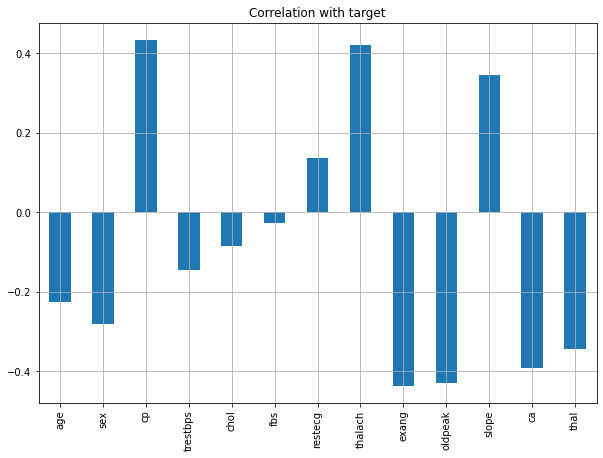

In [7]:
df.drop('target',axis=1).corrwith(df.target).plot(kind='bar',grid=True,figsize=(10,7),
                                                 title="Correlation with target")
plt.show()

 Let's work on feature selection and see if that can help us building better model.

# Model building using SelectPercentile features

In [8]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2


when we apply chi2 we get p values for all feature. Based on the p values. it will select top 80% of features.

Example- If p-value <0.05, it will reject null hypothesis. Default null hypothesis is , there is no relation b/w  feature and Target

In [9]:
#Instantiate selectpercentile and fit (feature, Label)
x=df.drop(['target'], axis=1)
y=df.target
SPercentile =SelectPercentile(score_func=chi2,percentile=80)
SPercentile= SPercentile.fit(x,y)

In [10]:
#Seperate the features to check p_values
cols=SPercentile.get_support(indices=True) # to return index numbers instead of boolean
print('Feature Index=', cols)

features=x.columns[cols]
print('Features=',list(features))


Feature Index= [ 0  1  2  3  4  7  8  9 10 11]
Features= ['age', 'sex', 'cp', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak', 'slope', 'ca']


In [11]:
df_scores=pd.DataFrame({'features':x.columns,'chi2score':SPercentile.scores_,'pValue':SPercentile.pvalues_})
df_scores.sort_values(by='chi2score',ascending=False)

,features,chi2score,pValue
7,thalach,188.320472,7.395102e-43
9,oldpeak,72.644253,1.552583e-17
11,ca,66.440765,3.605677e-16
2,cp,62.598098,2.534982e-15
8,exang,38.914377,4.428074e-10
4,chol,23.936394,9.957148e-07
0,age,23.286624,1.395673e-06
3,trestbps,14.823925,1.180286e-04
10,slope,9.804095,1.741237e-03
1,sex,7.576835,5.912318e-03


Let's print the top 80% features

In [12]:
# create subset of selected features

x=df[features]
y=df.target

In [13]:
#Import Libs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_scaler=scaler.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.3,random_state=42)

# GradientBoostingClassifier

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [15]:
gbdt_clf=GradientBoostingClassifier()
gbdt_clf.fit(x_train,y_train)
pred=gbdt_clf.predict(x_train)
gbdt_clf_report=pd.DataFrame(classification_report(y_train,pred,output_dict=True))
print("\n==============================Train Result==============================")

print(f"Accuracy score:{accuracy_score(y_train,pred)* 100 :.2f}%")
print("==============================================")
print(f"CLASSIFICATION REPORT : \n{gbdt_clf_report}")
print("==================================================")
print(f"confusion Matrix: \n{confusion_matrix(y_train,pred)}\n")


#**************************Test Score********************************

pred = gbdt_clf.predict(x_test)
clf_report=pd.DataFrame(classification_report(y_test,pred,output_dict=True))

print("\n==============================Test Result==============================")

print(f"Accuracy score:{accuracy_score(y_test,pred)* 100 :.2f}%")
print("==============================================")
print(f"CLASSIFICATION REPORT : \n{clf_report}")
print("==================================================")
print(f"confusion Matrix: \n{confusion_matrix(y_test,pred)}\n")




==============================Train Result==============================
Accuracy score:100.00%
CLASSIFICATION REPORT : 
              0      1  accuracy  macro avg  weighted avg
precision   1.0    1.0       1.0        1.0           1.0
recall      1.0    1.0       1.0        1.0           1.0
f1-score    1.0    1.0       1.0        1.0           1.0
support    97.0  115.0       1.0      212.0         212.0
confusion Matrix: 
[[ 97   0]
 [  0 115]]


==============================Test Result==============================
Accuracy score:83.52%
CLASSIFICATION REPORT : 
                   0          1  accuracy  macro avg  weighted avg
precision   0.809524   0.857143  0.835165   0.833333      0.835688
recall      0.829268   0.840000  0.835165   0.834634      0.835165
f1-score    0.819277   0.848485  0.835165   0.833881      0.835325
support    41.000000  50.000000  0.835165  91.000000     91.000000
confusion Matrix: 
[[34  7]
 [ 8 42]]



In [16]:
#Let's try if we can improve the performance of our model using parameter tuning

# Hyperparameter tuning

In [17]:
from sklearn.model_selection import GridSearchCV

In [33]:
grid_param = {
       'max_depth' : range(4,8),
       'min_samples_split':range(2,8,2),
       'learning_rate':np.arange(0.1,0.3)
}

In [34]:
grid=GridSearchCV(GradientBoostingClassifier(),param_grid=grid_param)
grid.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': array([0.1]),
                         'max_depth': range(4, 8),
                         'min_samples_split': range(2, 8, 2)})

In [35]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'min_samples_split': 4}

In [39]:
gbdt_clf=GradientBoostingClassifier(
max_depth=4,min_samples_split=2,learning_rate=0.05)
gbdt_clf.fit(x_train,y_train)
pred=gbdt_clf.predict(x_train)
gbdt_clf_report=pd.DataFrame(classification_report(y_train,pred,output_dict=True))
print("\n==============================Train Result==============================")

print(f"Accuracy score:{accuracy_score(y_train,pred)* 100 :.2f}%")
print("==============================================")
print(f"CLASSIFICATION REPORT : \n{gbdt_clf_report}")
print("==================================================")
print(f"confusion Matrix: \n{confusion_matrix(y_train,pred)}\n")


#**************************Test Score********************************

pred = gbdt_clf.predict(x_test)
clf_report=pd.DataFrame(classification_report(y_test,pred,output_dict=True))

print("\n==============================Test Result==============================")

print(f"Accuracy score:{accuracy_score(y_test,pred)* 100 :.2f}%")
print("==============================================")
print(f"CLASSIFICATION REPORT : \n{clf_report}")
print("==================================================")
print(f"confusion Matrix: \n{confusion_matrix(y_test,pred)}\n")




==============================Train Result==============================
Accuracy score:100.00%
CLASSIFICATION REPORT : 
              0      1  accuracy  macro avg  weighted avg
precision   1.0    1.0       1.0        1.0           1.0
recall      1.0    1.0       1.0        1.0           1.0
f1-score    1.0    1.0       1.0        1.0           1.0
support    97.0  115.0       1.0      212.0         212.0
confusion Matrix: 
[[ 97   0]
 [  0 115]]


==============================Test Result==============================
Accuracy score:85.71%
CLASSIFICATION REPORT : 
                   0          1  accuracy  macro avg  weighted avg
precision   0.818182   0.893617  0.857143   0.855899      0.859630
recall      0.878049   0.840000  0.857143   0.859024      0.857143
f1-score    0.847059   0.865979  0.857143   0.856519      0.857455
support    41.000000  50.000000  0.857143  91.000000     91.000000
confusion Matrix: 
[[36  5]
 [ 8 42]]



# You can still tune the parameter with different range and try to improve the score